# 📺 Netflix Data Analysis
### Exploratory Data Analysis (EDA)

## 🎯 Objective

The objective of this analysis is to explore the Netflix Titles dataset and uncover trends related to content type, genres, ratings, and release patterns.

## 📦 Importing Required Libraries

We import the essential Python libraries for data manipulation, visualization, and analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 📂 Loading the Dataset

The dataset is loaded into a Pandas DataFrame for further analysis.

In [2]:
Netflix=pd.read_csv('Netflix_titles.csv')

## 📊 Dataset Information

Understanding data types, non-null counts, and memory usage of the dataset.

In [3]:
Netflix.info()

<class 'pandas.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   str  
 1   type          8807 non-null   str  
 2   title         8807 non-null   str  
 3   director      6173 non-null   str  
 4   cast          7982 non-null   str  
 5   country       7976 non-null   str  
 6   date_added    8797 non-null   str  
 7   release_year  8807 non-null   int64
 8   rating        8803 non-null   str  
 9   duration      8804 non-null   str  
 10  listed_in     8807 non-null   str  
 11  description   8807 non-null   str  
dtypes: int64(1), str(11)
memory usage: 825.8 KB


## 🔍 Preview of Dataset

Displaying the first few rows to understand the structure and contents of the dataset.

In [5]:
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## ❗ Visualizing Missing Values

A heatmap is used to identify missing data across different columns in the dataset.

<Axes: >

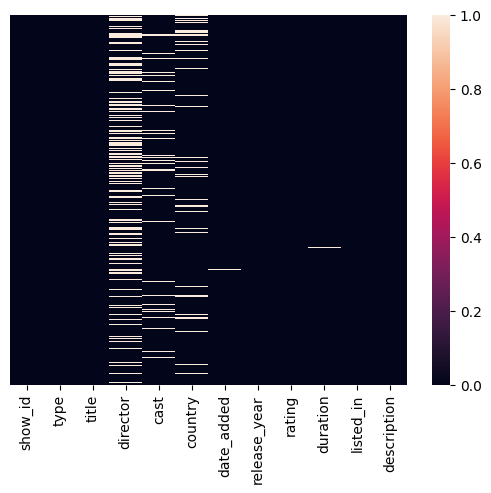

In [6]:
sns.heatmap(Netflix.isnull(),yticklabels=False)

## 🌍 Country Analysis

Examining the distribution of content by country and identifying missing country values.

In [7]:
Netflix['country'].value_counts()

country
United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
United Arab Emirates, Jordan                        1
Name: count, Length: 748, dtype: int64

In [8]:
Netflix['country'].isnull().value_counts()

country
False    7976
True      831
Name: count, dtype: int64

## 🎭 Genre Exploration

Analyzing the most common content categories listed in the dataset.

In [9]:
Netflix['listed_in'].value_counts().head(20)

listed_in
Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Kids' TV                                             220
Children & Family Movies                             215
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               138
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Ind

## 📉 Missing Values Summary

Calculating the number of missing values in each column.

In [11]:
Netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## 📌 Percentage of Missing Data

Determining the proportion of missing values in each column.

In [12]:
Netflix.isnull().mean()*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [13]:
Netflix['country']=Netflix['country'].fillna('UNKNOWN')

In [14]:
Netflix['country'] = Netflix['country'].str.strip() 
Netflix['country'] = Netflix['country'].str.title() 

## ⚙️ Feature Engineering — Country List

Splitting multiple countries into a list for easier analysis.

In [15]:
Netflix['country_list']=Netflix['country'].str.split(' ,')

## 🎬 Handling Missing Values — Director Column

Missing director names are replaced with "Unknown".

In [16]:
Netflix['director'].isnull().sum()

np.int64(2634)

In [17]:
Netflix['director']=Netflix['director'].fillna('Unknown',inplace=True)

C:\Users\Kavya\AppData\Local\Temp\ipykernel_8096\1765017216.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  Netflix['director']=Netflix['director'].fillna('Unknown',inplace=True)


In [18]:
Netflix['director'].isnull().sum()

np.int64(0)

In [19]:
Netflix['director'].head(20)

0                                   Kirsten Johnson
1                                           Unknown
2                                   Julien Leclercq
3                                           Unknown
4                                           Unknown
5                                     Mike Flanagan
6                     Robert Cullen, José Luis Ucha
7                                      Haile Gerima
8                                   Andy Devonshire
9                                    Theodore Melfi
10                                          Unknown
11                                Kongkiat Komesiri
12                              Christian Schwochow
13                                    Bruno Garotti
14                                          Unknown
15                                          Unknown
16    Pedro de Echave García, Pablo Azorín Williams
17                                          Unknown
18                                       Adam Salky
19          

In [20]:
Netflix['director'].value_counts()

director
Unknown                    2634
Rajiv Chilaka                19
Raúl Campos, Jan Suter       18
Suhas Kadav                  16
Marcus Raboy                 16
                           ... 
Mu Chu                        1
Chandra Prakash Dwivedi       1
Majid Al Ansari               1
Peter Hewitt                  1
Mozez Singh                   1
Name: count, Length: 4529, dtype: int64

## 🎭 Handling Missing Values — Cast Column

Missing cast information is replaced with "unknown".

In [21]:
Netflix['cast'].isnull().sum()

np.int64(825)

In [22]:
Netflix['cast']=Netflix['cast'].fillna('unknown')

In [23]:
Netflix['cast'].isnull().sum()

np.int64(0)

In [24]:
Netflix['cast'].head(10)

0                                              unknown
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                              unknown
4    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5    Kate Siegel, Zach Gilford, Hamish Linklater, H...
6    Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
7    Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
8    Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...
9    Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
Name: cast, dtype: str

In [25]:


# Step 1: Remove null values first
Netflix = Netflix[Netflix['cast'].notna()]

# Step 2: Split actors into list
Netflix['cast'] = Netflix['cast'].apply(lambda x: x.split(','))

# Step 3: Explode into separate rows
Netflix = Netflix.explode('cast')

# Step 4: Remove extra spaces
Netflix['cast'] = Netflix['cast'].apply(lambda x: x.strip())

# Step 5: Remove 'unknown'
Netflix = Netflix[Netflix['cast'] != 'unknown']

# Step 6: Count actor frequency
actor_count = Netflix['cast'].value_counts()

# Step 7: Show top actors
print(actor_count.head(10))

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64


In [26]:
Netflix.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_list
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[South Africa]
1,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[South Africa]
1,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[South Africa]
1,s2,TV Show,Blood & Water,Unknown,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[South Africa]
1,s2,TV Show,Blood & Water,Unknown,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[South Africa]


In [27]:
Netflix.dropna(inplace=True)

## ✅ Missing Values After Cleaning

Rechecking the dataset to confirm that missing values have been handled.

<Axes: >

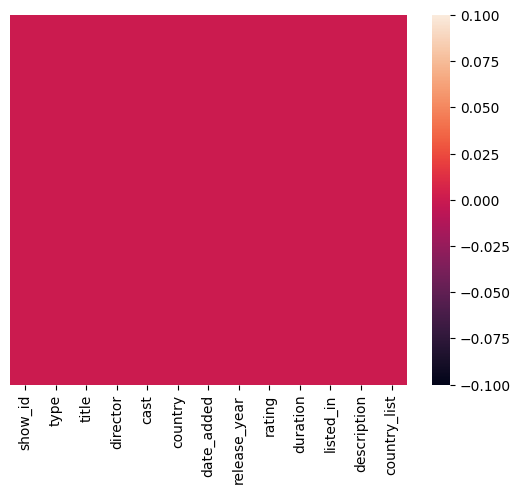

In [28]:
sns.heatmap(Netflix.isnull(),yticklabels=False)

## 📅 Date Processing

Cleaning and converting the "date_added" column into datetime format for time-based analysis.

In [29]:
Netflix['date_added']= Netflix['date_added'].str.strip()

In [30]:
import datetime

In [31]:
Netflix['date_added']=pd.to_datetime(Netflix['date_added'],errors='coerce')

In [32]:
Netflix['date_added']=pd.to_datetime(Netflix['date_added'],errors='coerce',format='%b %d,%y')

## 🗓️ Feature Engineering — Year Added

Extracting the year from the date the content was added to Netflix.

In [ ]:
Netflix['year_added']=Netflix['date_added'].dt.year


In [ ]:
Netflix['month_added']=Netflix['date_added'].dt.month
Netflix['day_added']=Netflix['date_added'].dt.day

In [34]:
Netflix.info()

<class 'pandas.DataFrame'>
Index: 64016 entries, 1 to 8806
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       64016 non-null  str           
 1   type          64016 non-null  str           
 2   title         64016 non-null  str           
 3   director      64016 non-null  str           
 4   cast          64016 non-null  str           
 5   country       64016 non-null  str           
 6   date_added    64016 non-null  datetime64[us]
 7   release_year  64016 non-null  int64         
 8   rating        64016 non-null  str           
 9   duration      64016 non-null  str           
 10  listed_in     64016 non-null  str           
 11  description   64016 non-null  str           
 12  country_list  64016 non-null  object        
 13  year_added    64016 non-null  int32         
 14  month_added   64016 non-null  int32         
 15  day_added     64016 non-null  int32         
dtypes: 

## ⭐ Rating Distribution

Analyzing the distribution of content ratings.

In [35]:
Netflix['rating'].value_counts()

rating
TV-MA       22534
TV-14       14988
R            7570
TV-PG        4838
PG-13        4797
PG           2783
TV-Y7        2697
TV-Y         1795
TV-G         1055
NR            452
G             426
NC-17          29
TV-Y7-FV       27
UR             25
Name: count, dtype: int64

In [36]:
Netflix['country'].head(5)

1    South Africa
1    South Africa
1    South Africa
1    South Africa
1    South Africa
Name: country, dtype: str

In [37]:
Netflix['country_list'].head(5)

1    [South Africa]
1    [South Africa]
1    [South Africa]
1    [South Africa]
1    [South Africa]
Name: country_list, dtype: object

## 🎭 Feature Engineering — Primary Genre

Extracting the first genre from the "listed_in" column for simplified analysis.

In [38]:
Netflix['genre']=Netflix['listed_in'].str.split(',').str[0]

In [39]:
Netflix=Netflix.reset_index(drop=True)

## 📊 Top Genres

Visualizing the most common genres available on Netflix.

Text(0.5, 1.0, 'Top 10 Genre')

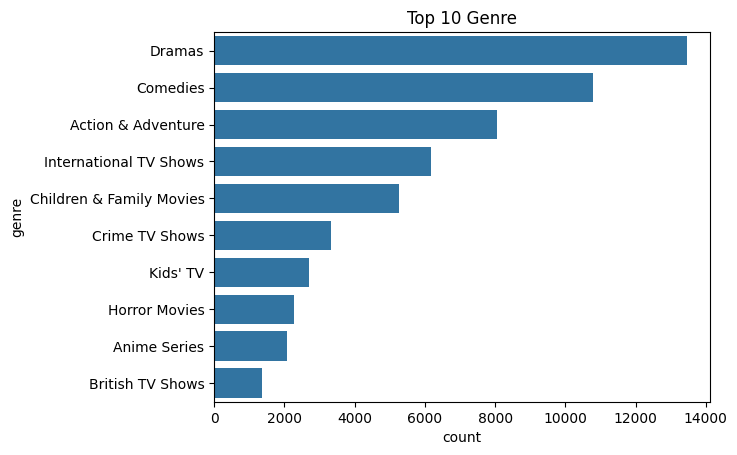

In [40]:
sns.countplot(data=Netflix,y='genre',order=Netflix['genre'].value_counts().index[:10])
plt.title('Top 10 Genre')

## 🎭 Top 10 Most Featured Cast Members

This section identifies the actors who appear most frequently in Netflix titles within the dataset.

By analyzing the "cast" column, we can determine which performers have the highest number of appearances across Movies and TV Shows. This helps reveal popular or frequently collaborating actors on the platform.

The visualization highlights the top 10 cast members based on their occurrence count.

Text(0.5, 1.0, 'Top 10 Actors')

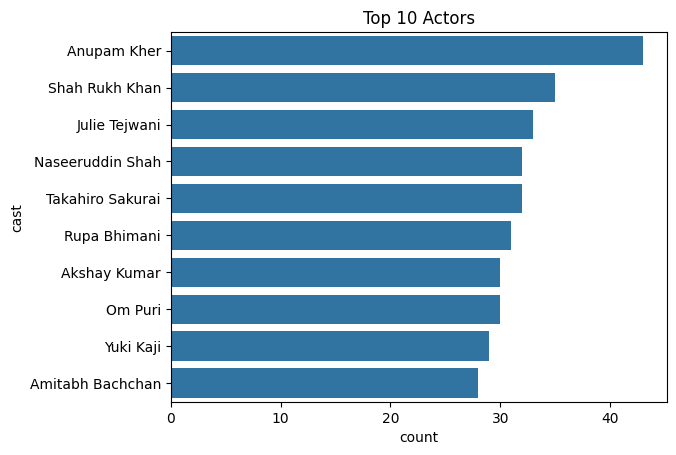

In [41]:
sns.countplot(data=Netflix,y='cast',order=Netflix['cast'].value_counts().index[:10])
plt.title('Top 10 Actors')

## 🔗 Rating vs Content Type

Comparing ratings across Movies and TV Shows.

Text(0.5, 1.0, 'Rating Comparision b/w Movies and TV Show')

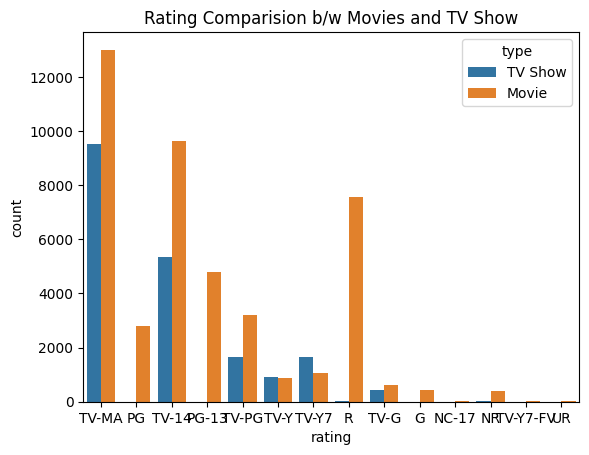

In [43]:

sns.countplot(x='rating',data=Netflix,hue='type')
plt.title('Rating Comparision b/w Movies and TV Show')

Text(0.5, 1.0, 'Rating Comparision')

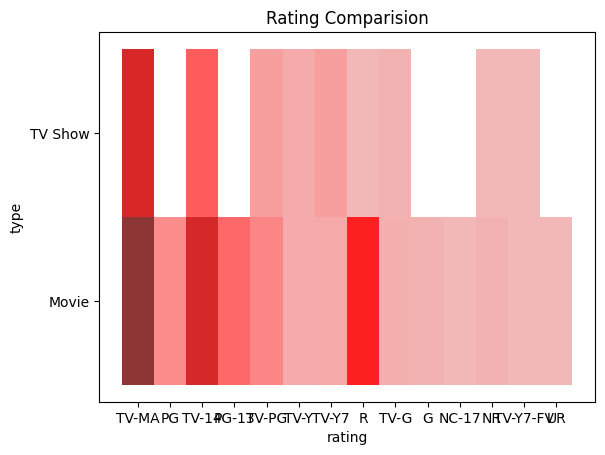

In [44]:
sns.histplot(data=Netflix,x='rating',y='type',color='darkred')
plt.title('Rating Comparision')

## 🎬 Content Type Distribution

Showing the proportion of Movies versus TV Shows on Netflix.

Text(0.5, 1.0, 'Movie vs TV Show')

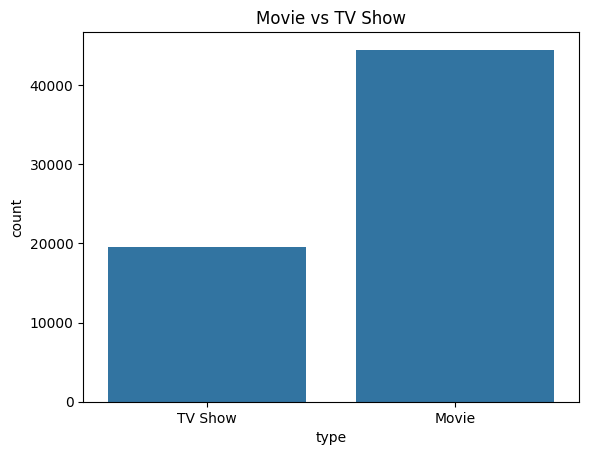

In [45]:
sns.countplot(x='type',data=Netflix)
plt.title('Movie vs TV Show')

## 📈 Content Added Over Years

Visualizing how the number of titles added to Netflix has changed over time.

Text(0.5, 1.0, 'Year Trend')

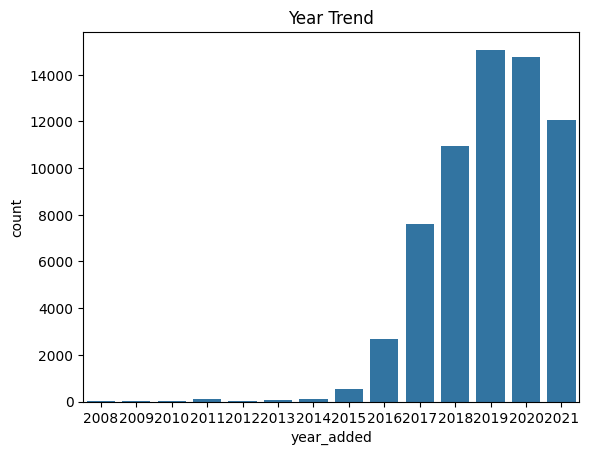

In [57]:
sns.countplot(x='year_added',data=Netflix)
plt.title('Year Trend')

## 📅 Content Added by Day

Analyzing which days of the month content is most frequently added.

Text(0.5, 1.0, 'Day Trend')

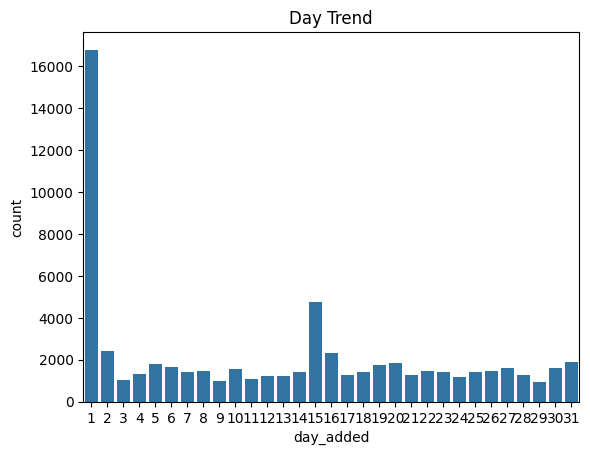

In [47]:
sns.countplot(x='day_added',data=Netflix)
plt.title('Day Trend')

In [48]:
Netflix['genre'].value_counts().head(5)

genre
Dramas                      13452
Comedies                    10783
Action & Adventure           8054
International TV Shows       6174
Children & Family Movies     5254
Name: count, dtype: int64

## 💡 Key Insights

- Movies dominate the Netflix catalog compared to TV Shows.
- Most content was added in recent years, indicating rapid platform growth.
- Certain genres such as Drama and Comedy are the most common.
- A small number of actors appear frequently across titles.
- Content is concentrated in a few major countries.

## ✅ Conclusion

The analysis reveals significant patterns in Netflix’s content strategy, including a strong focus on movies, popular genres, and specific actors. The platform has expanded rapidly over recent years, with content additions increasing substantially.